Mass per cm: 0.008000 g/cm
First x (cm) -> mmol: 1.0 cm -> 0.329150 mmol
Slope (m) [cm³ per cm]: 7.871428571428571
Intercept (b): 0.20000000000001958
Predicted y values: [ 8.07142857 15.94285714 23.81428571 31.68571429 39.55714286 47.42857143]
R^2: 0.9985396898485421


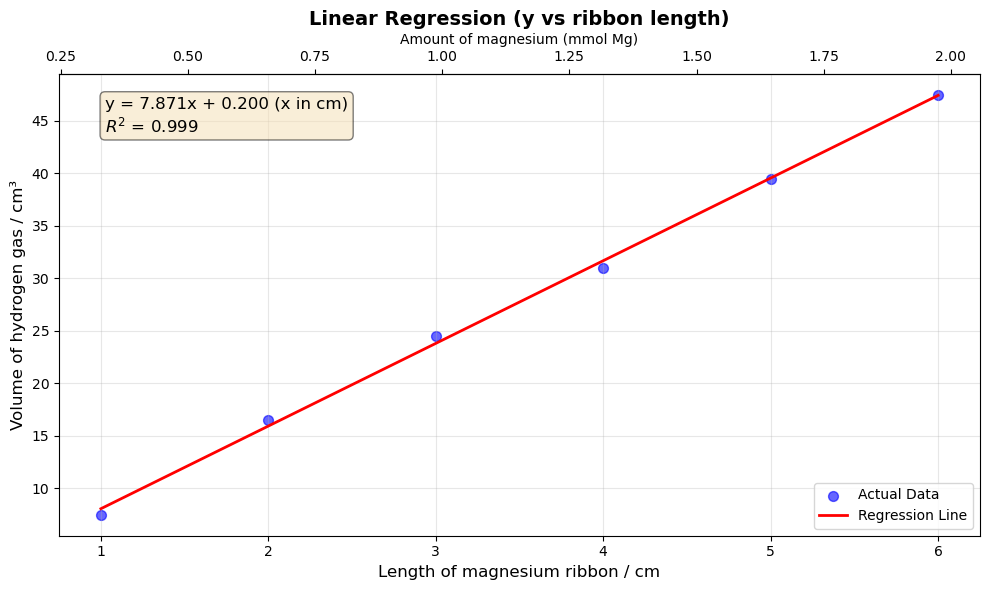

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Manually enter your data here - just edit these lists
# Core practical 1 p 133
x_cm = [1, 2, 3, 4, 5, 6]            # length of Mg ribbon in cm
y = [7.5, 16.5, 24.5, 31.0, 39.5, 47.5]  # volume of hydrogen gas in cm^3

# Constants to convert cm of Mg ribbon to moles of Mg
mass_25_cm_g = 0.200     # g per 25 cm (given)
length_25_cm = 25.0      # cm
molar_mass_Mg = 24.305   # g/mol

# Compute mass per cm and conversions
mass_per_cm = mass_25_cm_g / length_25_cm  # g/cm
x_cm = np.array(x_cm, dtype=float)
y = np.array(y, dtype=float)
# For reference (top axis), convert cm -> mmol and back
cm_to_mmol = lambda L: 1000.0 * ((L * mass_per_cm) / molar_mass_Mg)
mmol_to_cm = lambda n_mmol: ((n_mmol / 1000.0) * molar_mass_Mg) / mass_per_cm

print(f"Mass per cm: {mass_per_cm:.6f} g/cm")
print(f"First x (cm) -> mmol: {x_cm[0]} cm -> {cm_to_mmol(x_cm[0]):.6f} mmol")

# Calculate slope (m) and intercept (b) using LENGTH (cm) on the x-axis
m, b = np.polyfit(x_cm, y, 1)

print(f"Slope (m) [cm³ per cm]: {m}")
print(f"Intercept (b): {b}")

# Predict y values on the cm scale
y_pred = m * x_cm + b
print("Predicted y values:", y_pred)

# Optional: Calculate R^2
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)
print(f"R^2: {r2}")

# Create plot
plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.scatter(x_cm, y, color='blue', label='Actual Data', s=50, alpha=0.6)
plt.plot(x_cm, y_pred, color='red', linewidth=2, label='Regression Line')

# Add regression equation to plot (x in cm)
equation_text = f'y = {m:.3f}x + {b:.3f} (x in cm)\n$R^2$ = {r2:.3f}'
plt.text(0.05, 0.95, equation_text, transform=ax.transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.xlabel('Length of magnesium ribbon / cm', fontsize=12)
plt.ylabel('Volume of hydrogen gas / cm³', fontsize=12)
plt.title('Linear Regression (y vs ribbon length)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)

# Use plain tick labels on cm axis
ax.ticklabel_format(style='plain', axis='x')

# Add a secondary top x-axis showing the equivalent amount in mmol
secax = ax.secondary_xaxis('top', functions=(cm_to_mmol, mmol_to_cm))
secax.set_xlabel('Amount of magnesium (mmol Mg)')

plt.tight_layout()
plt.show()

In [6]:
# Calculate length of Mg ribbon needed for 0.001 mol
# Given: 25 cm of Mg ribbon has a mass of 0.200 g
# Molar mass of Mg (periodic table): ~24.305 g/mol

mass_25_cm_g = 0.200
length_25_cm = 25.0  # cm
molar_mass_Mg = 24.305  # g/mol
moles_target = 0.001  # mol

# Mass per cm of ribbon
mass_per_cm = mass_25_cm_g / length_25_cm  # g/cm

# Mass of Mg required for target moles
mass_needed_g = moles_target * molar_mass_Mg  # g

# Length required
length_needed_cm = mass_needed_g / mass_per_cm

print(f"Mass per cm: {mass_per_cm:.4f} g/cm")
print(f"Mass needed for {moles_target} mol Mg: {mass_needed_g:.5f} g")
print(f"Length of Mg ribbon required: {length_needed_cm:.2f} cm")

Mass per cm: 0.0080 g/cm
Mass needed for 0.001 mol Mg: 0.02431 g
Length of Mg ribbon required: 3.04 cm


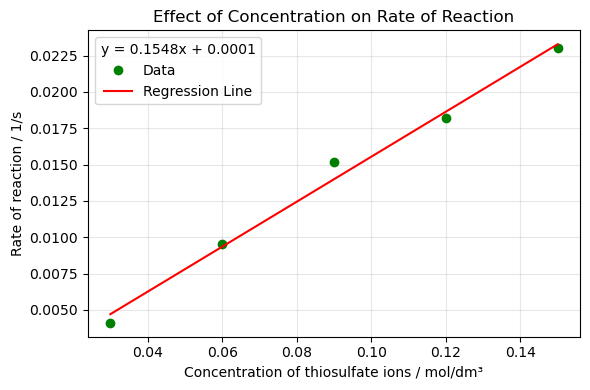

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Enter your data here
x = [0.15, 0.12, 0.09, 0.06, 0.03]
y = [0.023, 0.018181818, 0.015151515, 0.00952381, 0.004115226]

x = np.array(x)
y = np.array(y)

# Linear regression
m, b = np.polyfit(x, y, 1)
y_fit = m * x + b

plt.figure(figsize=(6, 4))
plt.plot(x, y, 'o', color='green', label='Data')
plt.plot(x, y_fit, '-', color='red', label='Regression Line')

# Regression equation text
eq_text = f'y = {m:.4f}x + {b:.4f}'
plt.legend(title=eq_text, loc='best')

plt.xlabel('Concentration of thiosulfate ions / mol/dm³')
plt.ylabel('Rate of reaction / 1/s')
plt.title('Effect of Concentration on Rate of Reaction')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()